In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')
import pandas as pd 
df=pd.read_csv('gdrive/My Drive/summer.csv')

Mounted at /content/gdrive


In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

In [13]:
def word_frequency(sentence):
  # joins all the sentenses
  sentence =" ".join(sentence)
  # creates tokens, creates lower class, removes numbers and lemmatizes the words
  new_tokens = word_tokenize(sentence)
  new_tokens = [t.lower() for t in new_tokens]
  new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
  new_tokens = [t for t in new_tokens if t.isalpha()]
  lemmatizer = WordNetLemmatizer()
  new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
  #counts the words, pairs and trigrams
  counted = Counter(new_tokens)
  counted_2= Counter(ngrams(new_tokens,2))
  counted_3= Counter(ngrams(new_tokens,3))
  #creates 3 data frames and returns thems
  word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
  word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
  trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
  return word_freq,word_pairs,trigrams,new_tokens

In [14]:
data2, data3, data4, tokens = word_frequency(df['title_orig'].tolist())

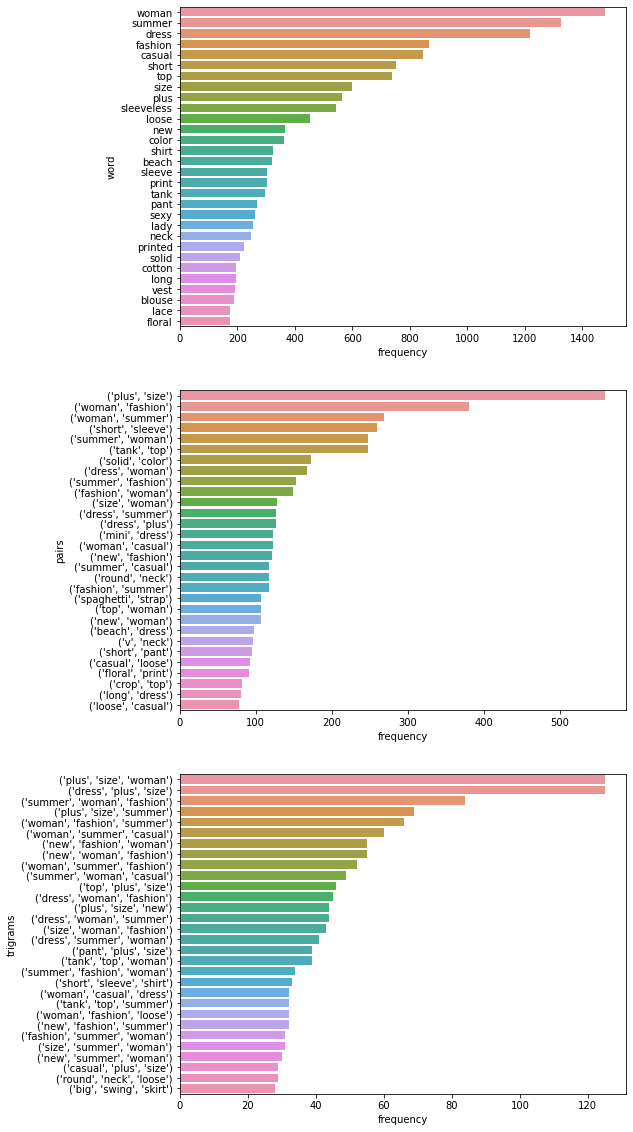

In [9]:
# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(30))

Word2Vec

In [ ]:
def process_sentence(sentence):
  new_tokens = word_tokenize(sentence)
  new_tokens = [t.lower() for t in new_tokens]
  new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
  new_tokens = [t for t in new_tokens if t.isalpha()]
  lemmatizer = WordNetLemmatizer()
  new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
  return new_tokens

In [38]:
titles = df['title_orig'].tolist()
data = [process_sentence(t) for t in titles]

Implemented based on official documentation: https://radimrehurek.com/gensim/models/word2vec.html.

In [ ]:
model = gensim.models.Word2Vec(sentences=data, size=100, window=5, min_count=1, workers=4)
model.train(data,total_examples=len(data),epochs=10)

In [51]:
print(model.wv['woman'])  # Find the vector of the word.
print(model.wv.most_similar('woman', topn=10))  # 10 Most similar words for inspection.

[-0.1581131   0.09934846 -0.7058963  -0.16014248 -0.32860386 -0.2720793
 -0.16415912  0.17069414  0.56094867 -0.10508979  0.00356123  0.4195579
 -0.05575141 -0.31963775 -0.5182238  -0.07505919 -0.78647214 -0.29615894
 -0.26529235 -0.6184194  -0.00942702  0.17270543  0.45139724  0.11661437
 -0.30900222 -0.3934676   0.05605415  0.24499951  0.00298779  0.05094996
 -0.55269706 -0.37369028  0.29269323 -0.3889926  -0.28527835 -0.03049456
 -0.62575394  0.07438751 -0.5785675  -0.22631519  0.11352623  0.13455094
 -0.17354761 -0.01994848  0.03027114 -0.05443105  0.05280039 -0.04731348
  0.21781817  0.15165557 -0.04090364 -0.10403859 -0.27963692  0.04583907
  0.12219215  0.27867755  0.00992721 -0.5965949  -0.22464782  0.57912743
 -0.03274499  0.07531353  0.42624804  0.50061893 -0.1924544  -0.00413321
  0.09808784  0.3771426  -0.06121953 -0.03305356 -0.48568535  0.01386806
 -0.26598784  0.12262876  0.06006617  0.03924805 -0.32601997  0.432181
 -0.3295122  -0.17547113  0.22224203 -0.2975092   0.020

In [68]:
def caculate_average_word2vec(model, word_list):
  sum = np.matrix([model.wv[w] for w in word_list]).sum(axis=0)
  return sum / len(word_list)

In [69]:
word2vec_avg = [caculate_average_word2vec(model, d) for d in data]
df['word2vec_avg'] = word2vec_avg